In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('loan.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(614, 13)

In [5]:
#features in data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Are there any missing values?
df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Lets describe the dataset
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

According to Described Information:
All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode )
mean is higher than the median, which means  data is right skewed and ouliers are present

In [9]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Loan_ID : 614
number of unique valuse of Gender : 2
number of unique valuse of Married : 2
number of unique valuse of Dependents : 4
number of unique valuse of Education : 2
number of unique valuse of Self_Employed : 2
number of unique valuse of ApplicantIncome : 505
number of unique valuse of CoapplicantIncome : 287
number of unique valuse of LoanAmount : 203
number of unique valuse of Loan_Amount_Term : 10
number of unique valuse of Credit_History : 2
number of unique valuse of Property_Area : 3
number of unique valuse of Loan_Status : 2


In [10]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
cat_col.drop('Loan_Status',inplace=True)
num_col = df.dtypes[df.dtypes != 'object']
cat_col

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
dtype: object

# Univariate  Analysis

In [11]:
# Let's find out how many of each class there
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
#loan status percentage in dataset
print('Percentage',df.Loan_Status.value_counts(normalize=True))

Percentage Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


Text(0.5, 6.79999999999999, 'Loan_Status')

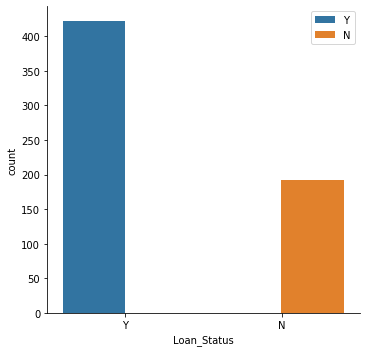

In [13]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='Loan_Status',data=df,kind='count',hue='Loan_Status')
plt.legend()
plt.xlabel("Loan_Status")
#here we we see data is imbalanced but both the classes have significant number of instances

ApplicantIncome         AxesSubplot(0.125,0.657941;0.227941x0.222059)
CoapplicantIncome    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
LoanAmount           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Credit_History       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

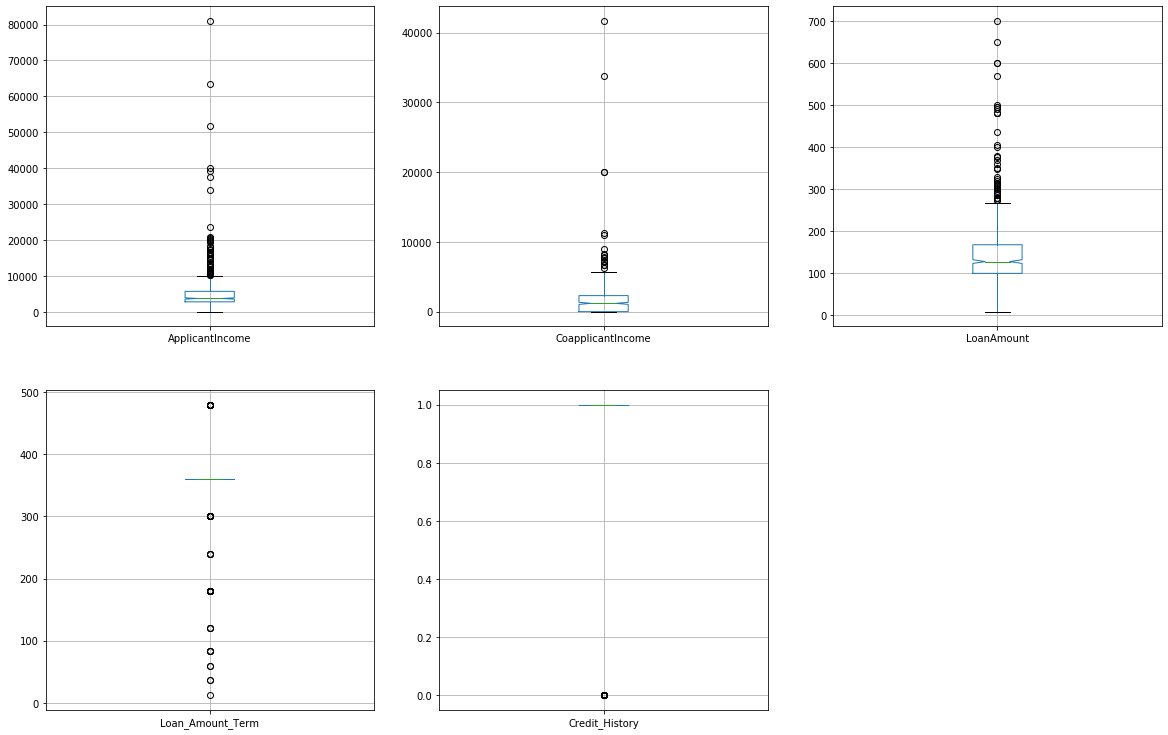

In [14]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FA739AA88>,
      dtype=object)

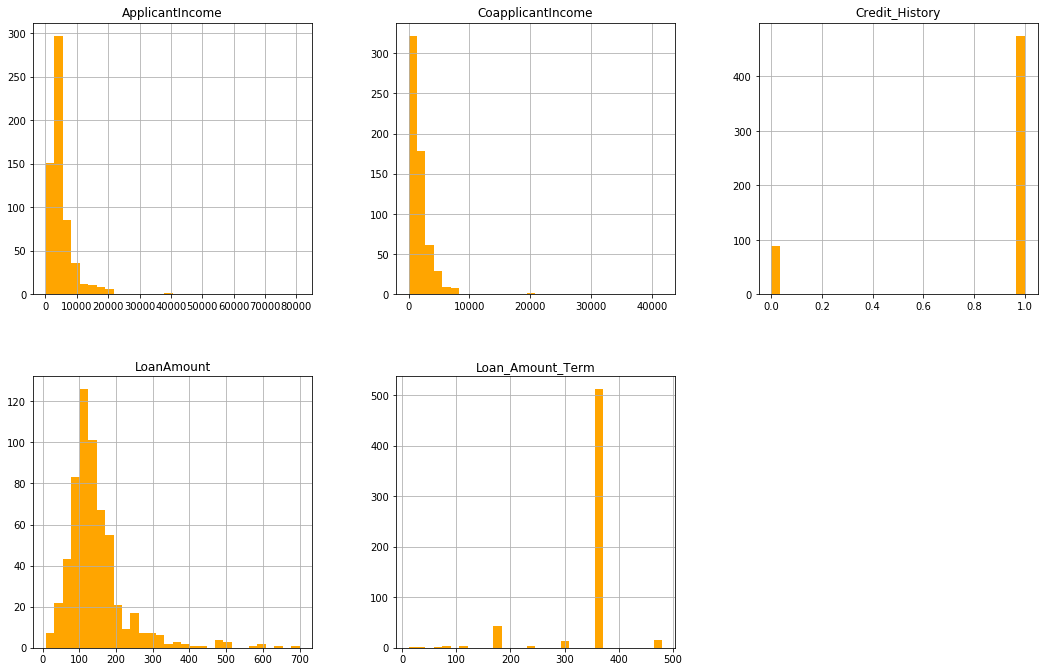

In [15]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(3,3),bins=30,color='orange')

# Bivariate  Analysis

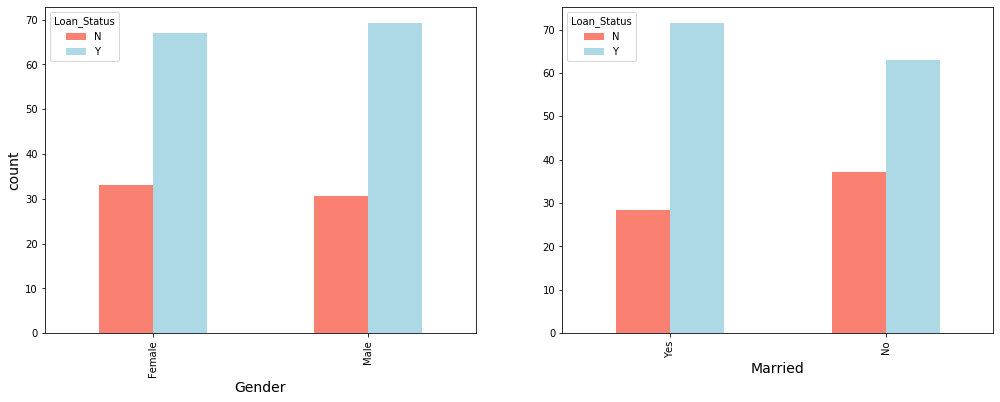

In [16]:
#plot of all input featues with output feature(Loan_Status)
table_gen = pd.crosstab(df['Gender'], df['Loan_Status'])
table_marr = pd.crosstab(df['Married'], df['Loan_Status'])
table_edu = pd.crosstab(df['Education'], df['Loan_Status'])
table_dep = pd.crosstab(df['Dependents'], df['Loan_Status'])
table_selfemp = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
table_pro = pd.crosstab(df['Property_Area'], df['Loan_Status'])
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_gen.div(table_gen.sum(axis= 1),axis = 0)*100).sort_values(by= 'Y').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Gender",fontsize = 14);
plt.ylabel('count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marr.div(table_marr.sum(axis = 1),axis = 0)*100).sort_values(by = 'N').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Married",fontsize = 14);

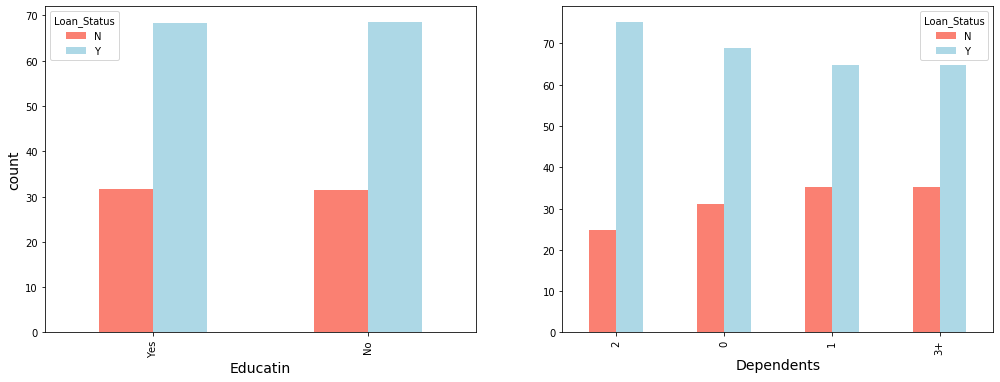

In [17]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_selfemp.div(table_selfemp.sum(axis= 1),axis = 0)*100).sort_values(by= 'Y').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Educatin",fontsize = 14);
plt.ylabel('count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_dep.div(table_dep.sum(axis = 1),axis = 0)*100).sort_values(by = 'N').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Dependents",fontsize = 14);

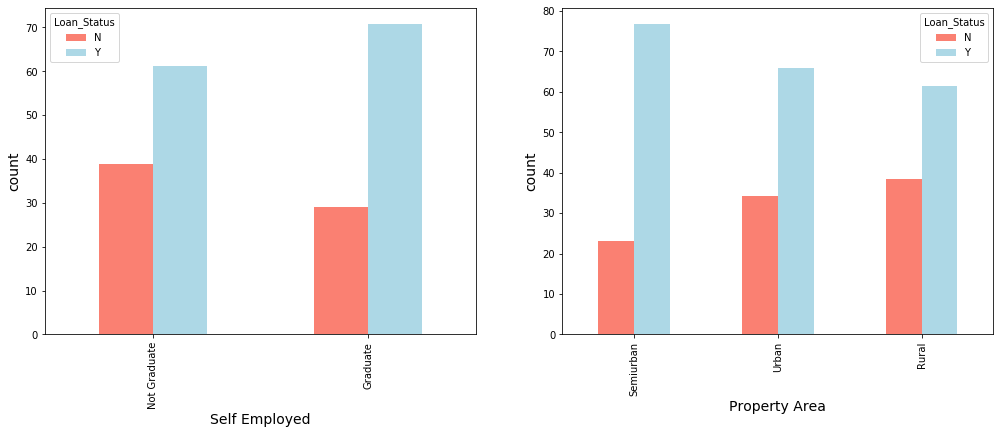

In [18]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis= 1),axis = 0)*100).sort_values(by= 'Y').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Self Employed",fontsize = 14);
plt.ylabel('count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_pro.div(table_pro.sum(axis = 1),axis = 0)*100).sort_values(by = 'N').plot(kind = 'bar',ax=ax,color=["salmon", "lightblue"]);
plt.xlabel("Property Area",fontsize = 14);
plt.ylabel('count',fontsize = 14);

In [19]:
# Compare target column with Credit_History column
pd.crosstab(df.Credit_History, df.Loan_Status)

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

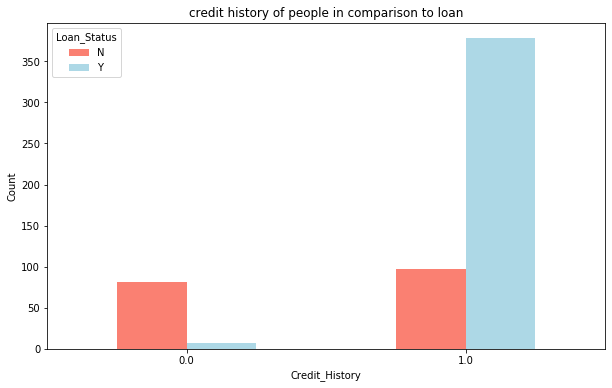

In [20]:
# Create a plot of previous crosstab
pd.crosstab(df.Credit_History, df.Loan_Status).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("credit history of people in comparison to loan")
plt.ylabel("Count")
plt.xticks(rotation=0);

In [21]:
# Printing the mean values of different fields corresponding to the respective Loan_Status.
df.groupby('Loan_Status')[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History'
                          ]].mean().sort_values(by = 'Loan_Status',ascending = False)


LoanAmount  ApplicantIncome  CoapplicantIncome  Credit_History
Loan_Status                                                                
Y            144.294404      5384.068720        1504.516398        0.981818
N            151.220994      5446.078125        1877.807292        0.541899

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

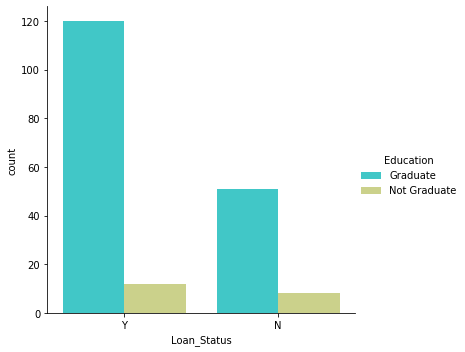

In [23]:
#Lets check loan status for applicant income greater than 5000
sns.catplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000],hue='Education',kind='count',palette='rainbow')
plt.show()

 Number of persons who got loans are more who have salary greater than 5000 , also even if you have salary more than 5k doesn't mean your request will be accepted thus graduation also needed to be there.

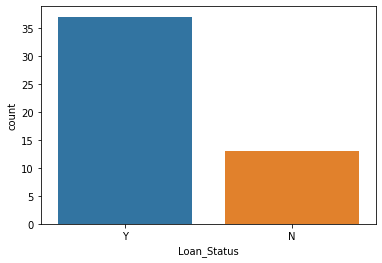

In [24]:
#Lets check what is the effect on above count if Credit_History is 1 and CoapplicantIncome greater than zero
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>5000)&(df["Credit_History"]==1)&df["CoapplicantIncome"]>0])

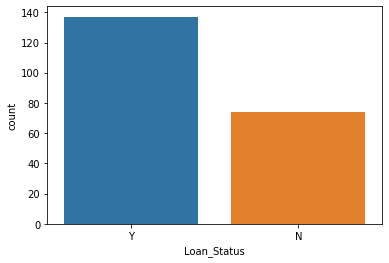

In [25]:
sns.countplot(x="Loan_Status",data=df.loc[df["LoanAmount"]>145])

Number of persons whose loan amount is greater than 145 have more chances to get loan request accepted.

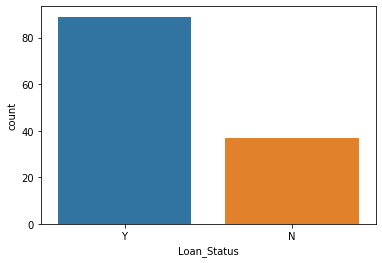

In [26]:
#Lets check what is the effect on above count if co-aplicant income is 0 and application income grater than 5000
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>5000)&(df["CoapplicantIncome"]==0)])
plt.show()

As we see that after filtering with Coapplicantincome number of persons who got loan decreases.

In [27]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List1=['Loan_ID','Gender','Education','Married','Dependents','Self_Employed','Property_Area','Loan_Status']
for i in List1:
    df[i]=le.fit_transform(df[i].astype(str))
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[614 rows x 13 columns]

In [29]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

imp1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#Coverting objects missing values with most_frequent
df['Gender']=imp1.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp1.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp1.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp1.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Credit_History']=imp1.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp1.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [30]:
#lets remove the skewness
for i in df.drop(['Loan_Status'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

Loan_ID              0.000000
Gender               2.420085
Married              0.683385
Dependents           0.627265
Education            1.367622
Self_Employed        1.872051
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -1.183420
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [31]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_loan=df.loc[(z<3).all(axis=1)]
print(df_loan.shape)#shape of dataset after outliers removed

(614, 13)
(559, 13)


In [32]:
df_loan.skew()

Loan_ID              0.008603
Gender              -1.664342
Married             -0.644342
Dependents           0.654076
Education            1.330229
Self_Employed        1.917539
ApplicantIncome      0.609563
CoapplicantIncome   -0.194317
LoanAmount           0.042152
Loan_Amount_Term    -3.004889
Credit_History      -2.043751
Property_Area       -0.051071
Loan_Status         -0.863146
dtype: float64

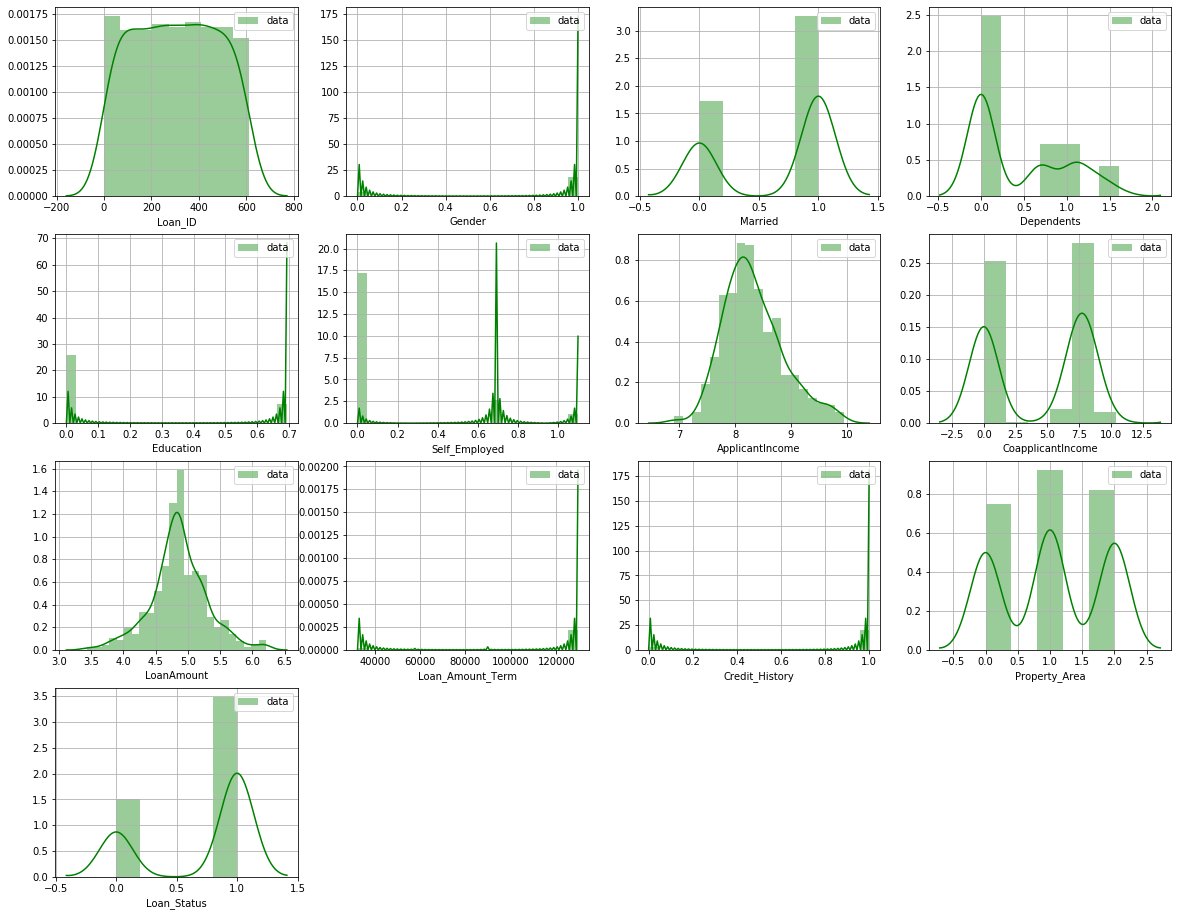

In [33]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_loan.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_loan[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

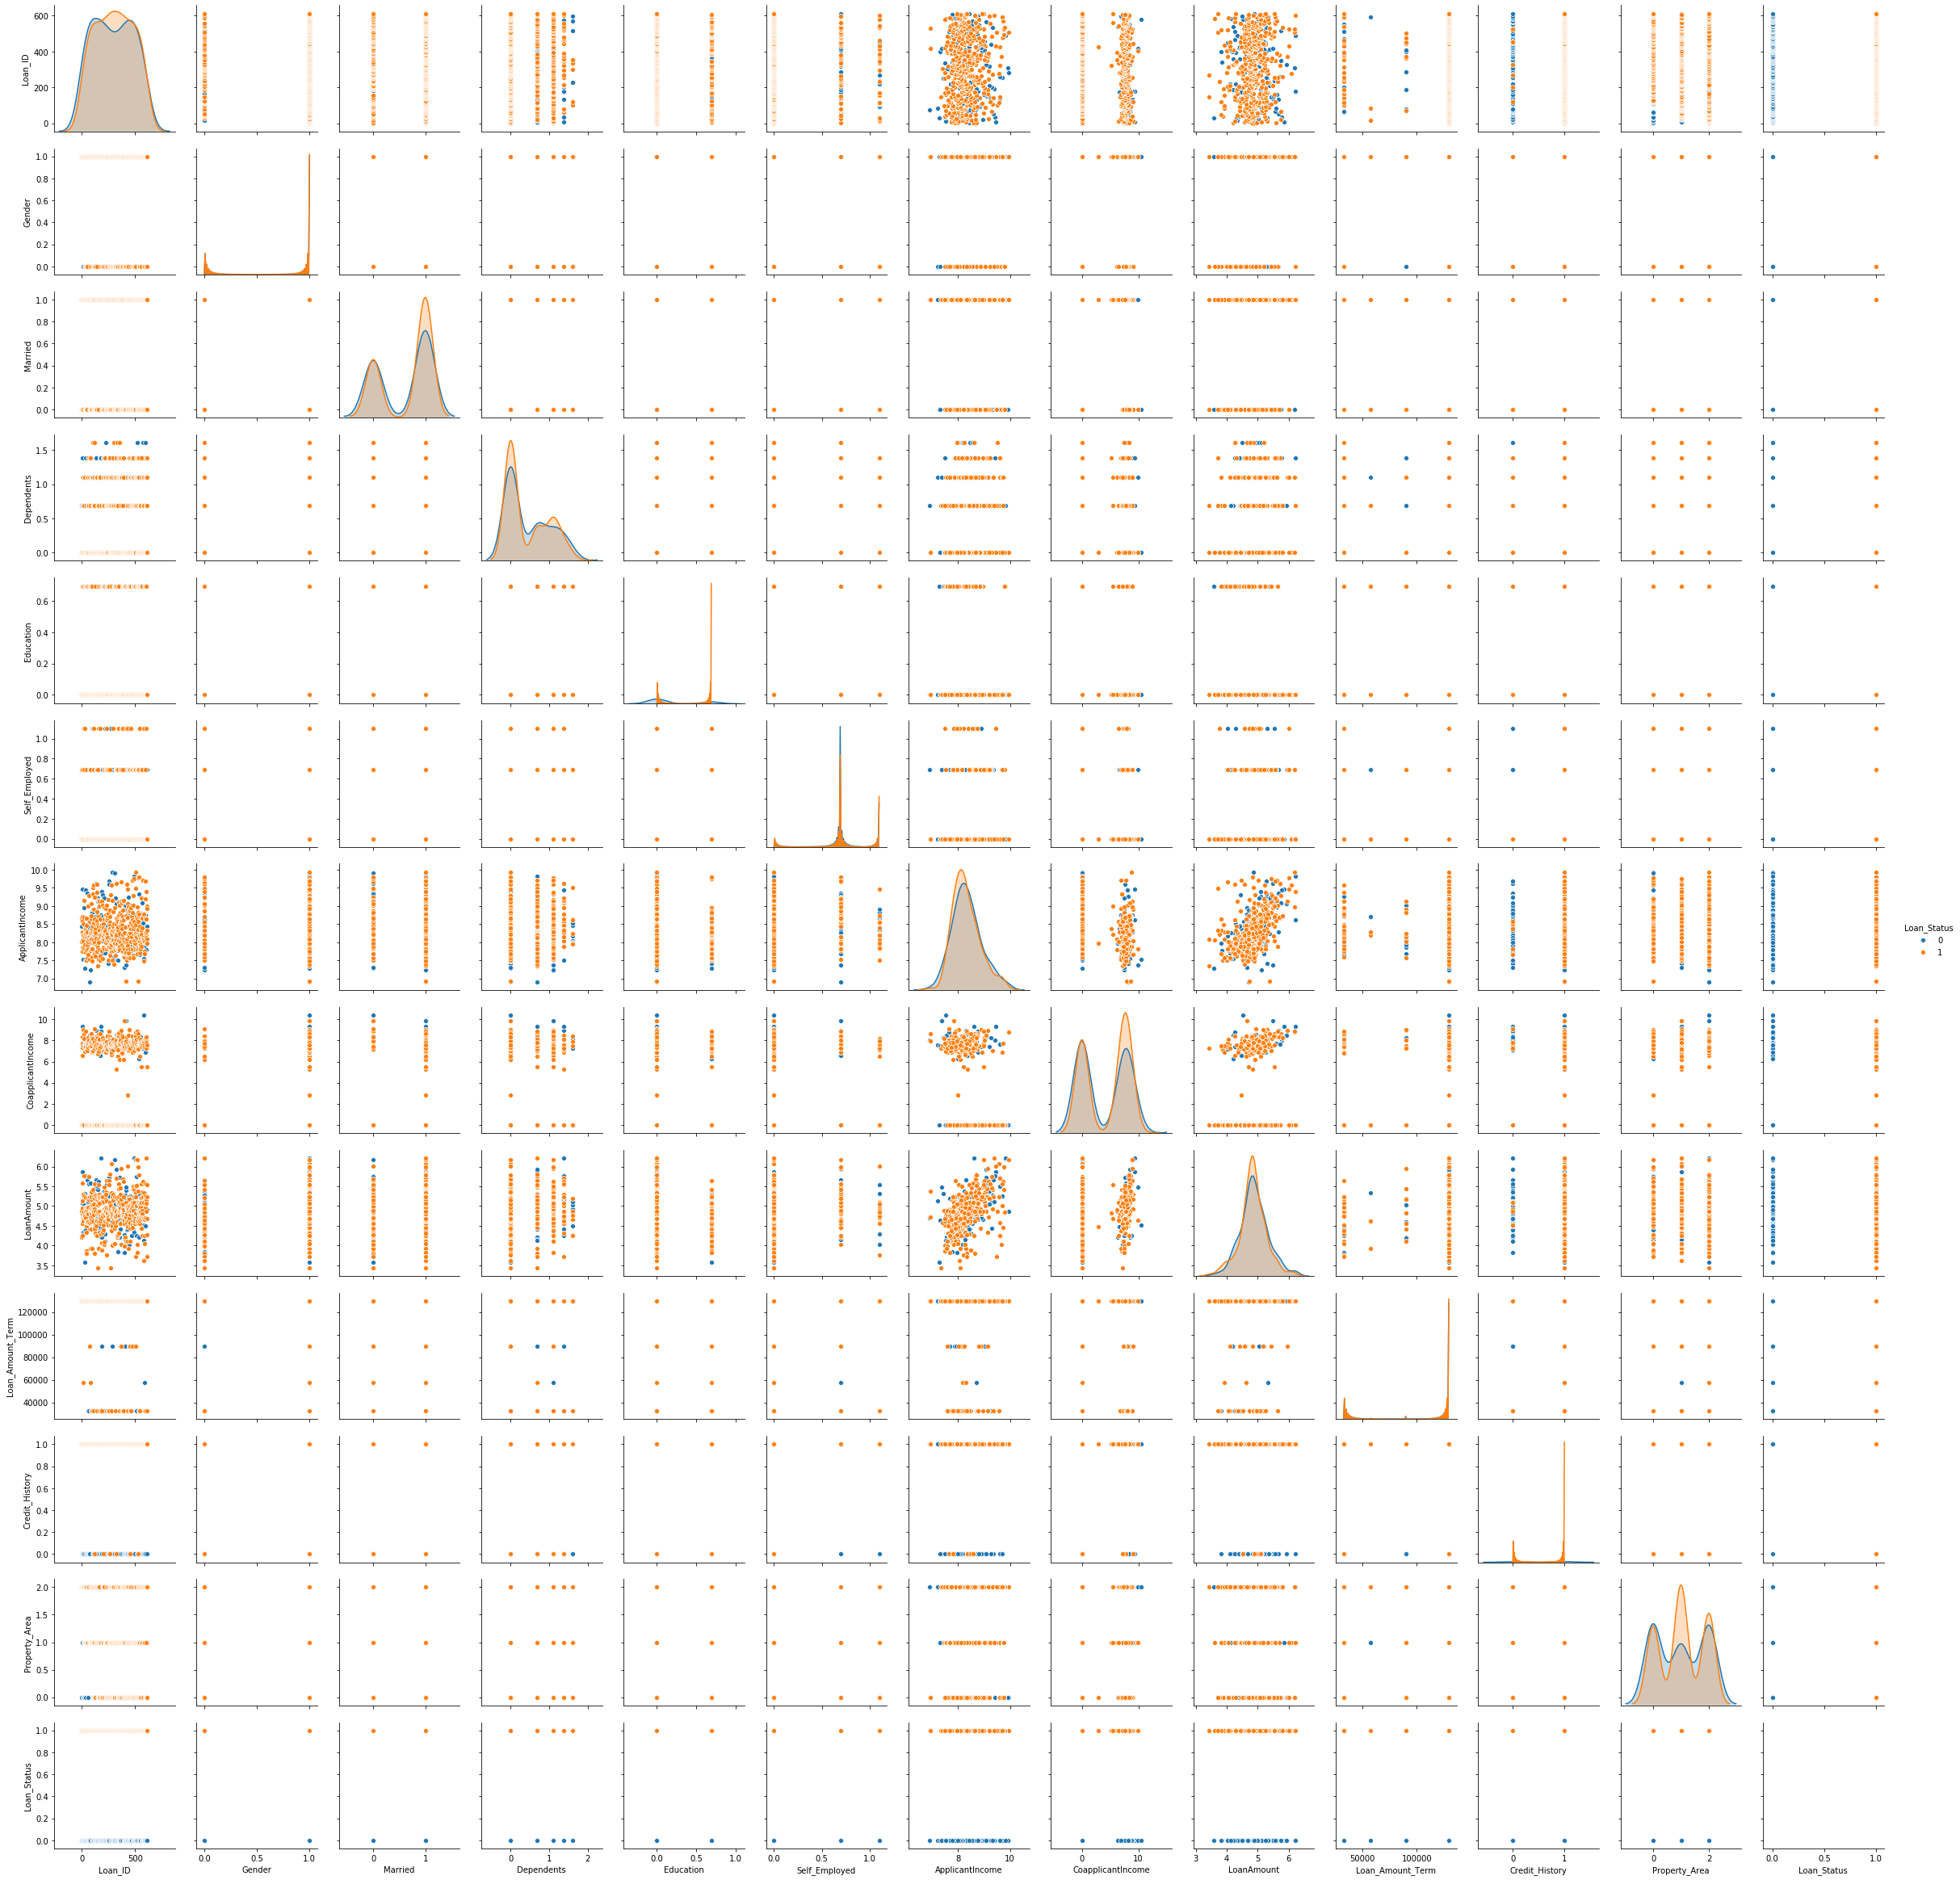

In [34]:
# Plotting Pairplot.....
sns.pairplot(df_loan,hue='Loan_Status')

(13.0, 0.0)

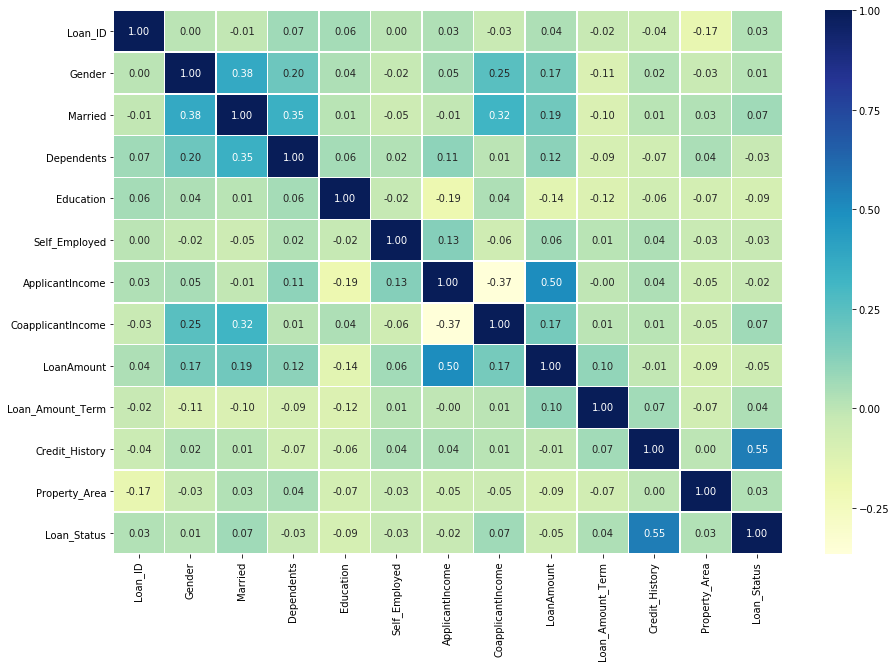

In [35]:
# Plotting Heatmap for Correlation
corr_matrix = df_loan.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

In [36]:
# Split data into X and y
X = df_loan.drop("Loan_Status", axis=1)

y = df_loan["Loan_Status"]

In [37]:
# Independent variables (no target column)
X.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0    0.000000   0.000000       0.000000   
1        1       1        1    0.693147   0.000000       0.000000   
2        2       1        1    0.000000   0.000000       0.693147   
3        3       1        1    0.000000   0.693147       0.000000   
4        4       1        0    0.000000   0.000000       0.000000   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         8.674197           0.000000    4.859812          129600.0   
1         8.430327           7.319202    4.859812          129600.0   
2         8.006701           0.000000    4.204693          129600.0   
3         7.857094           7.765993    4.795791          129600.0   
4         8.699681           0.000000    4.955827          129600.0   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              0  
2             1.0              2  
3             1.0              2  
4             1.0              2

In [38]:
# Target variable
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 559, dtype: int32

In [39]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0   -1.714608  0.469600 -1.371657   -0.811653  -0.536673      -0.455543   
1   -1.708955  0.469600  0.729045    0.477517  -0.536673      -0.455543   
2   -1.703301  0.469600  0.729045   -0.811653  -0.536673       1.703156   
3   -1.697648  0.469600  0.729045   -0.811653   1.863330      -0.455543   
4   -1.691995  0.469600 -1.371657   -0.811653  -0.536673      -0.455543   
..        ...       ...       ...         ...        ...            ...   
554  1.728251 -2.129473 -1.371657   -0.811653  -0.536673      -0.455543   
555  1.733904  0.469600  0.729045    1.766687  -0.536673      -0.455543   
556  1.739557  0.469600  0.729045    0.477517  -0.536673      -0.455543   
557  1.745211  0.469600  0.729045    1.231633  -0.536673      -0.455543   
558  1.750864 -2.129473 -1.371657   -0.811653  -0.536673       1.703156   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.644882          -1.118395   -0.004199          0.316374   
1           0.189791           0.773654   -0.004199          0.316374   
2          -0.600747          -1.118395   -1.490527          0.316374   
3          -0.879932           0.889152   -0.149451          0.316374   
4           0.692439          -1.118395    0.213638          0.316374   
..               ...                ...         ...               ...   
554        -0.663990          -1.118395   -1.327235          0.316374   
555        -0.015257          -1.118395   -2.604776         -3.437579   
556         1.245929           0.299452    1.532955          0.316374   
557         1.129325          -1.118395    0.850294          0.316374   
558         0.189791          -1.118395    0.082077          0.316374   

     Credit_History  Property_Area  
0          0.408674       1.224913  
1          0.408674      -1.297100  
2          0.408674       1.224913  
3          0.408674       1.224913  
4          0.408674       1.224913  
..              ...            ...  
554        0.408674      -1.297100  
555        0.408674      -1.297100  
556        0.408674       1.224913  
557        0.408674       1.224913  
558       -2.446937      -0.036093  

[559 rows x 12 columns]

In [40]:
#since it is imbalanced dataset so we will focus on auc-roc score.
!pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

Requirement already up-to-date: imbalanced-learn in c:\users\devanshu suri\anaconda3\lib\site-packages (0.6.2)


In [41]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [42]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [43]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 98 is: 0.8699186991869918
max acc score corresponding to 98 is: 0.8699186991869918
max acc score corresponding to 42 is: 0.8455284552845529
max acc score corresponding to 98 is: 0.8699186991869918
max acc score corresponding to 98 is: 0.8699186991869918
max acc score corresponding to 73 is: 0.7804878048780488
max acc score corresponding to 98 is: 0.8617886178861789
max acc score corresponding to 48 is: 0.8292682926829268
max acc score corresponding to 54 is: 0.8536585365853658


{'Logistic Regression': 0.823394495412844,
 'KNN': 0.841743119266055,
 'Random Forest': 1.0,
 'GaussianNB': 0.823394495412844,
 'SVC': 0.8256880733944955,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9311926605504587,
 'XGBClassifier': 1.0,
 'AdaBoostClassifier': 0.8463302752293578}

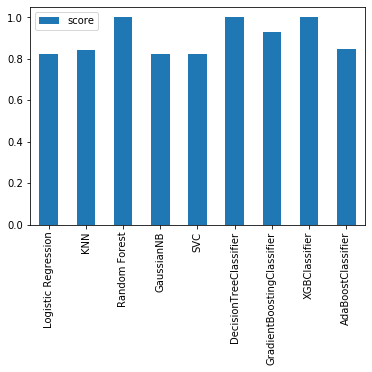

In [44]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 98 is: 0.8699186991869918
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy Score= 0.8699186991869918


Cross_val_score= 0.752502399561223


roc_auc_score =  0.7837837837837838


Classification report
               precision    recall  f1-score   support

           0       1.00      0.57      0.72        37
           1       0.84      1.00      0.91        86

    accuracy                           0.87       123
   macro avg       0.92      0.78      0.82       123
weighted avg       0.89      0.87      0.86       123



[[21 16]
 [ 0 86]]





******************** Random Forest *********************


max acc score corresponding to 98 is: 0.8617886178861789
RandomForestClassifier(bootstrap=True,

Cross_val_score= 0.7154120389414507


roc_auc_score =  0.7721558768070396


Classification report
               precision    recall  f1-score   support

           0       0.91      0.57      0.70        37
           1       0.84      0.98      0.90        86

    accuracy                           0.85       123
   macro avg       0.88      0.77      0.80       123
weighted avg       0.86      0.85      0.84       123



[[21 16]
 [ 2 84]]







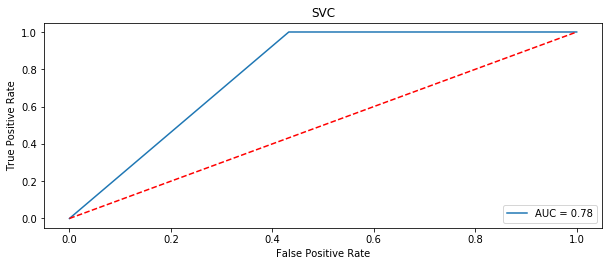

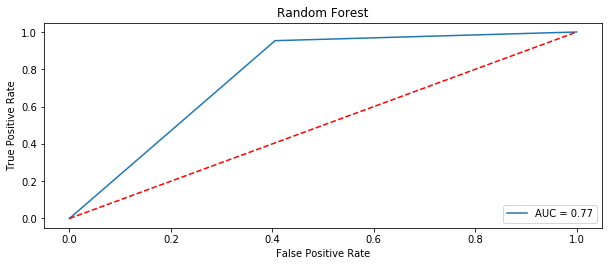

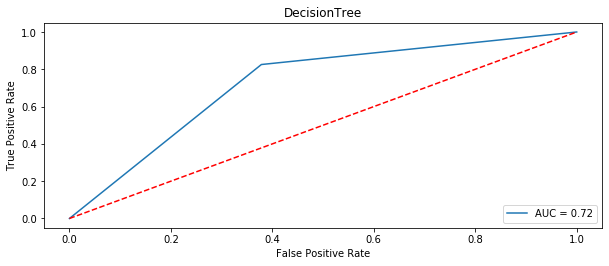

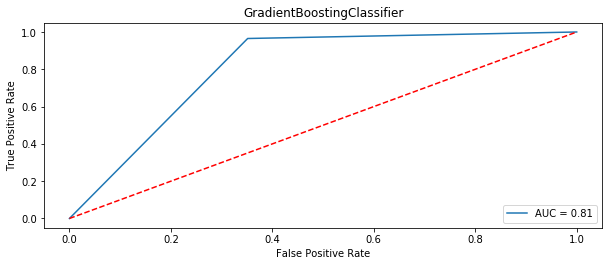

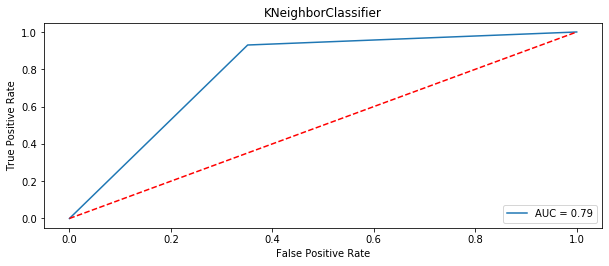

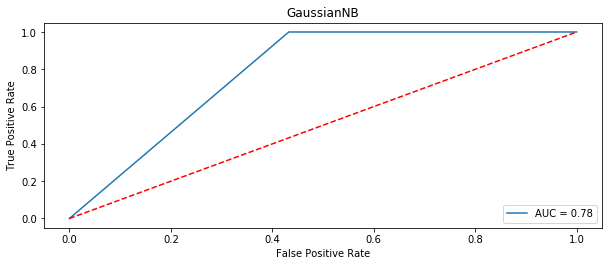

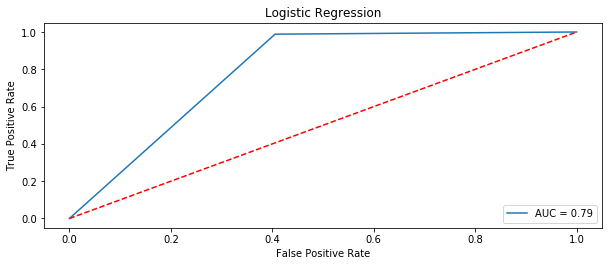

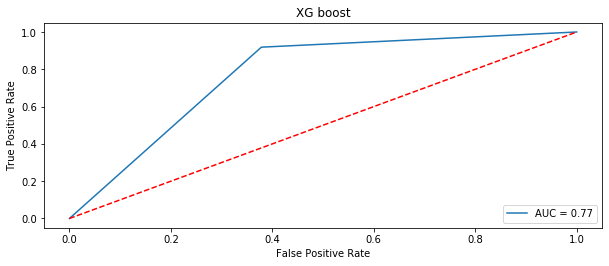

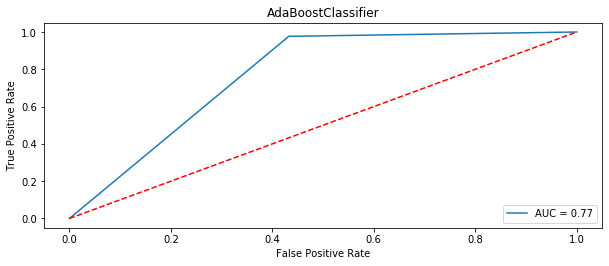

In [45]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.22,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [46]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  accuracy_score  Cross_val_score  Roc_auc_curve
0                         SVC       86.991870        75.250240      78.378378
1               Random Forest       84.552846        77.208968      77.404148
2                DecisionTree       76.422764        61.579597      72.360151
3  GradientBoostingClassifier       86.991870        69.164039      80.688246
4         KNeighborClassifier       84.552846        72.214224      78.944060
5                  GaussianNB       86.991870        74.911559      78.378378
6         Logistic Regression       86.991870        74.773070      79.148334
7                    XG boost       82.926829        74.042918      77.011314
8          AdaBoostClassifier       85.365854        71.541204      77.215588

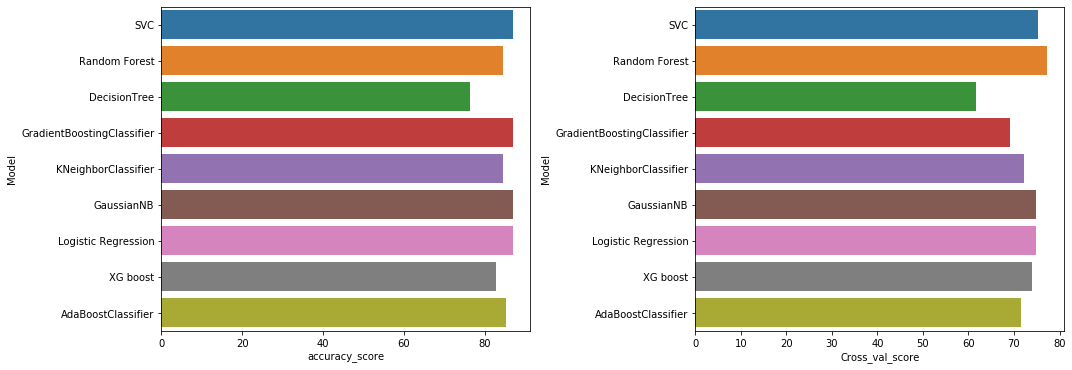

In [47]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [48]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV

In [49]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty': ['l1', 'l2']}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x, y);

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.03359818286283781, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l1, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear .............
[CV]  C=0.08858667904100823, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.08858667904100823, penalty=l2, solver=liblinear ......

[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=29.763514416313132, penalty=l2, solver=liblinear ..............
[CV]  C=29.763514416313132, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............
[CV]  C=78.47599703514607, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=78.47599703514607, penalty=l1, solver=liblinear ...............
[

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [50]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.012742749857031334, 'penalty': 'l1', 'solver': 'liblinear'}
score: 0.8193693693693694


In [51]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C=0.012742749857031334, solver='liblinear',penalty='l1')
print("LogisticRegression accuracy score:",maxrandomcore(clfR,x,y))
print("LogisticRegression roc_auc score:",max_aucroc_score(clfR,x,y))


max acc score corresponding to 98 is: 0.8699186991869918
LogisticRegression accuracy score: 98
max auc roc score corresponding to  98  is  0.7837837837837838
LogisticRegression roc_auc score: 98


In [52]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x, y);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.1s finished


In [53]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
score: 0.8139961389961389


In [54]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 11, weights= 'uniform')
print("KNeighborsClassifier accuracy score:",maxrandomcore(knn,x,y))
print("KNeighborsClassifier roc_auc score:",max_aucroc_score(knn,x,y))


max acc score corresponding to 98 is: 0.8536585365853658
KNeighborsClassifier accuracy score: 98
max auc roc score corresponding to  98  is  0.7254871150219988
KNeighborsClassifier roc_auc score: 98


In [55]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500,700, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=700 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=700, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.8s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=700, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.3min finished


In [56]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
score: 0.8119905956112852


In [57]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=500,max_depth=5, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
print("RandomForestClassifier accuracy score:",maxrandomcore(knn,x,y))
print("RandomForestClassifier roc_auc score:",max_aucroc_score(knn,x,y))


max acc score corresponding to 98 is: 0.8536585365853658
RandomForestClassifier accuracy score: 98
max auc roc score corresponding to  59  is  0.7660276555625393
RandomForestClassifier roc_auc score: 59


In [58]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  80 | elapsed:    0.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.5s finished


In [59]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'learning_rate': 0.001, 'n_estimators': 1000}
score: 0.8073928944618599


In [94]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(learning_rate= 0.001,n_estimators=1000)
print("GradientBoostingClassifier accuracy score:",maxrandomcore(gb,x,y))
print("GradientBoostingClassifier roc_auc score:",max_aucroc_score(gb,x,y))

max acc score corresponding to 98 is: 0.8699186991869918
GradientBoostingClassifier accuracy score: 98
max auc roc score corresponding to  48  is  0.7836266499057197
GradientBoostingClassifier roc_auc score: 48


In [61]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total= 2.2min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total= 2.0min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total= 1.8min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total= 2.5min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total= 2.0min
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 20.7min finished


In [62]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
score: 0.8119905956112852


In [63]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
svc=SVC(C=1,gamma=0.001,kernel='linear')
print("SVC accuracy score:",maxrandomcore(svc,x,y))
print("SVC roc_auc score:",max_aucroc_score(svc,x,y))

max acc score corresponding to 98 is: 0.8699186991869918
SVC accuracy score: 98
max auc roc score corresponding to  42  is  0.7779698302954117
SVC roc_auc score: 42


In [64]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.3,0.1,0.08], #so called `eta` value
              'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'silent': [1,0],
              'subsample': [0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clfx = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfx.fit(x, y);

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, 

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05,

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, ma

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed:  1.6min finished


In [65]:
# best parameters for XGBClassifier
print("Best parameter:",gs_clfx.best_params_)
print("score:",gs_clfx.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.5}
score: 0.8265122265122266


In [66]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 7,min_child_weight= 3,missing=-999,n_estimators= 5,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.5)
print("xg accuracy score:",maxrandomcore(xg,x,y))
print("xg roc_auc score:",max_aucroc_score(xg,x,y))

max acc score corresponding to 98 is: 0.8699186991869918
xg accuracy score: 98
max auc roc score corresponding to  59  is  0.7718416090509114
xg roc_auc score: 59


In [67]:
#lets use gridsearchcv to find out best parameters for AdaBoostClassifier
grid_ad =  {
 'n_estimators': [50,60,70],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
}
clf = AdaBoostClassifier()

# Setup GridSearchCV
gs_clfad = GridSearchCV(estimator=clf,
                      param_grid=grid_ad,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfad.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.0s
[CV] learning_rate=0.01, n_estimators=50 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.1s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.0s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.1s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.1s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.1s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.1s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.1s
[CV] learning_rate=0.01, n_estimators=70 .............................
[CV] .

[CV] ................. learning_rate=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] ................. learning_rate=1, n_estimators=60, total=   0.1s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] ................. learning_rate=1, n_estimators=60, total=   0.1s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] ................. learning_rate=1, n_estimators=60, total=   0.1s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] ................. learning_rate=1, n_estimators=60, total=   0.1s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.7s finished


In [68]:
# best parameters for AdaBoostClassifier
print("Best parameter:",gs_clfad.best_params_)
print("score:",gs_clfad.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 50}
score: 0.8119905956112852


In [69]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
ad=AdaBoostClassifier(learning_rate=0.01,n_estimators=50)
print("ad accuracy score:",maxrandomcore(ad,x,y))
print("ad roc_auc score:",max_aucroc_score(ad,x,y))

max acc score corresponding to 98 is: 0.8699186991869918
ad accuracy score: 98
max auc roc score corresponding to  98  is  0.7837837837837838
ad roc_auc score: 98


In [70]:
#using AdaBoostClassifier base_estimator as RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,max_depth=5, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4,random_state=59)
ada_rm=AdaBoostClassifier(base_estimator=rf,learning_rate=0.01,n_estimators=50)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)
print("ad roc_auc score:",roc_auc_score(y_test, y_predrad))

Acc: 84.55%
Precision: 0.82
Recall: 1.00
F1 score: 0.90
ad roc_auc score: 0.7432432432432432


In [71]:
#using AdaBoostClassifier base_estimator as SVC
random_state=42
svc=SVC(C=1,gamma=0.001,kernel='linear',probability=True)
ada_rm1=AdaBoostClassifier(base_estimator=svc,learning_rate=0.3,n_estimators=50,algorithm='SAMME')
ada_rm1.fit(x_train, y_train)
y_predrad1 = ada_rm1.predict(x_test)
evaluate_preds(y_test,y_predrad1)
print("ad roc_auc score:",roc_auc_score(y_test, y_predrad1))

Acc: 84.55%
Precision: 0.82
Recall: 1.00
F1 score: 0.90
ad roc_auc score: 0.7432432432432432


# After all this process conclusion is that GradientBoostingClassifier  performing well.

In [84]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 98,test_size=0.22,stratify=y)
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
evaluate_preds(y_test,predgb)

Acc: 86.99%
Precision: 0.86
Recall: 0.97
F1 score: 0.91


{'accuracy': 0.87, 'precision': 0.86, 'recall': 0.97, 'f1': 0.91}

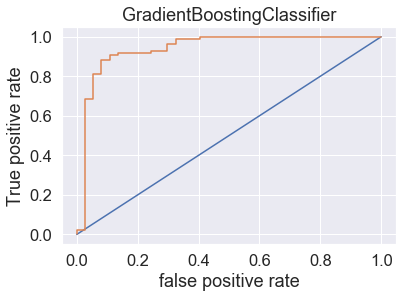

roc_auc_score =  0.9399748585795097


In [95]:
# Make predictions with probabilities
y_probs = gb.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[24 13]
 [ 3 83]]


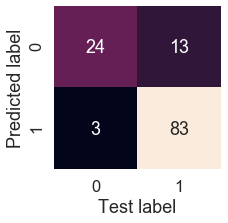

In [85]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgb):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgb),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgb)
print(confusion_matrix(y_test, predgb))

In [86]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgb
test
# On the lest side values are those fields which are taken by machine for test...

Loan_Status  Predicted values
32             0                 0
579            1                 1
43             1                 1
303            1                 1
523            1                 1
..           ...               ...
570            1                 1
407            1                 0
354            1                 1
505            1                 1
469            0                 1

[123 rows x 2 columns]

In [87]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predgb)
df1.to_csv('Project12_fraud_Loan_detection_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (target) 

In [88]:
# Find feature importance of our best model
gb.feature_importances_

array([1.51603853e-01, 1.13909016e-04, 8.98117688e-03, 1.56186348e-02,
       3.32327373e-03, 1.06024182e-02, 1.39478209e-01, 7.81597984e-02,
       1.70777032e-01, 1.06872872e-02, 3.81752830e-01, 2.89015776e-02])

In [89]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



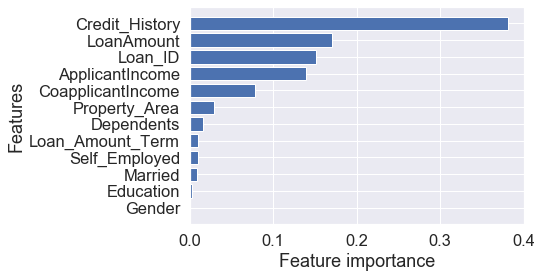

In [90]:
#bar plot of important features 
plot_features(x_train.columns, gb.feature_importances_)

Looks like Credit_history contribute the most.

In [91]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(gb,'Project12_fraud_Loan_detection_submission.pkl')

['Project12_fraud_Loan_detection_submission.pkl']

In [92]:
#read the file using joblib
gbr_from_joblib=joblib.load('Project12_fraud_Loan_detection_submission.pkl')
joblib_y_preds = gbr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.99%
Precision: 0.86
Recall: 0.97
F1 score: 0.91


{'accuracy': 0.87, 'precision': 0.86, 'recall': 0.97, 'f1': 0.91}

# Conclusion


1) Number of males who got loan are more than female.
2) Proportion of persons who are married and whose loan are accepted are more.  
3) Proportion of persons who have less dependents  and whose loan request is accepted are more than and it keeps decreasing as     depenents increases.
4) Number of persons who are graduated and whose loan request are accepted are more in number.
5) Mostle Loan requests of those who are not self employed are accepted.
6) Very few persons are there who have 0 credit score and whose loan request is accepted.
7) Large number of persons whose loan request is accepted are having a credit score of 1.
8) Loan request of those who have property in semiurban areas areaccepted more, after that those who have property in urban and   after that those who have property in rural areas.
9) Number of persons who got loans are more who have salary greater than 5000 , also even if you have salary more than 5k doesn't mean your request will be accepted thus graduation also needed to be there.
10) As we see that after filtering with Coapplicantincome number of persons who got loan decreases.
11)Number of persons whose loan amount is greater than 145 have more chances to get loan request accepted.





## Steps Followed:

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) GradientBoostingClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project11_Censys_Income_submission.csv file.
9) Pickle file is named with Project11_Censys_Income_submission.pkl 